In [4]:
%matplotlib inline

#import pandas as pd
from ipywidgets import Output, GridspecLayout
import time
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import itertools
from IPython.display import YouTubeVideo
from IPython import display

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

# Finding motifs in music with the matrix profile

Let's analyze **Lord of the Rings** fellowship theme!

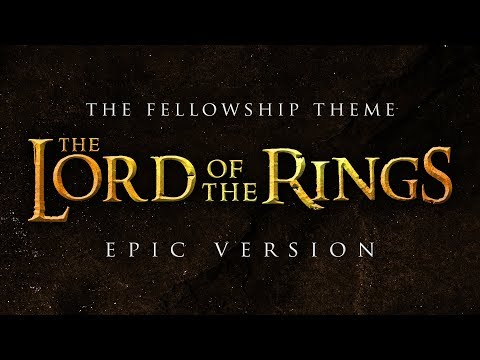

In [5]:
YouTubeVideo("vVwKbdBpNWE", start=28,width=600, height=300)

We download it and prepare it for analysis. 
```
ffmpeg -ac 1 -ar 1000 -i <inputFile> -vn <outputFile>
```

- `-ac 1` means sound in MONO (1 timeseries)  
- `-ar 1000` means a sample rate of 1kHz, ie 1000 points per seconds. 
  CD is 44.1kHz, but lower is fine for analysis.

In [6]:
from scipy.io import wavfile
AUDIO_FILE = "data/The_Fellowship_Theme_lotr_EPIC_VERSION-rate1k.wav"
sampleRate, audio = wavfile.read(AUDIO_FILE)
print(f"Music audio sample rate is {sampleRate}")
print(f"Music audio number of points: {audio.shape[0]}")

Music audio sample rate is 1000
Music audio number of points: 185319


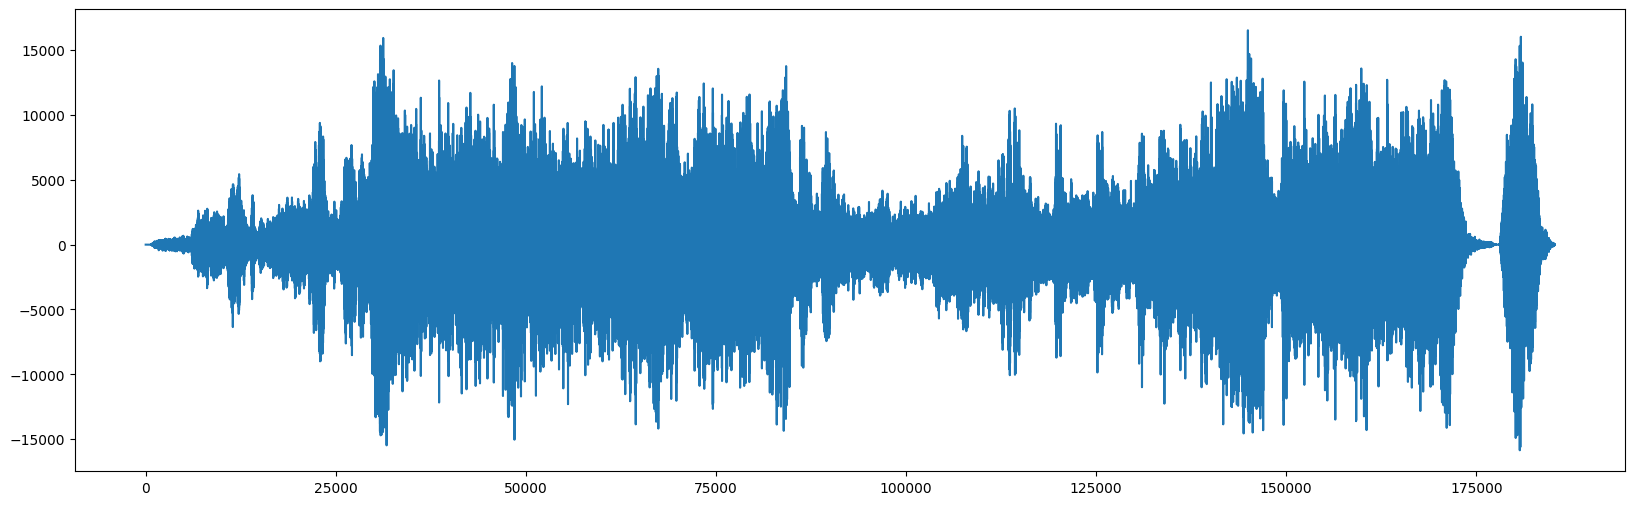

In [7]:
import matplotlib.pyplot as plt
plt.plot(audio)
plt.show()

## Question: Can I find repeating patterns (motifs)?

In [8]:
# pip install pyscamp
import pyscamp

In [19]:
# window of 5 seconds 
WINDOW = 5 * sampleRate

# compute the matrix profile
profile, index = pyscamp.selfjoin(audio, WINDOW)

print(f"Computed the Matrix Profile for {audio.shape[0]} points")

Computed the Matrix Profile for 185319 points


In [21]:
index

array([  1251,   1252,   1253, ..., 178386, 178387, 178388], dtype=int32)

In [22]:
def plot_matrix_profile(audio, profile, index):
    motif_idx = np.argsort(profile)[0]
    nearest_neighbor_idx = index[motif_idx]
    
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('Audio analysis', fontsize='30')

    axs[0].plot(audio)
    axs[0].set_ylabel('Audio', fontsize='20')
    rect = Rectangle((motif_idx, 0), WINDOW, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_idx, 0), WINDOW, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx, linestyle="dashed", color="red")
    axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed", color="red")
    axs[1].plot(profile)
    plt.show()

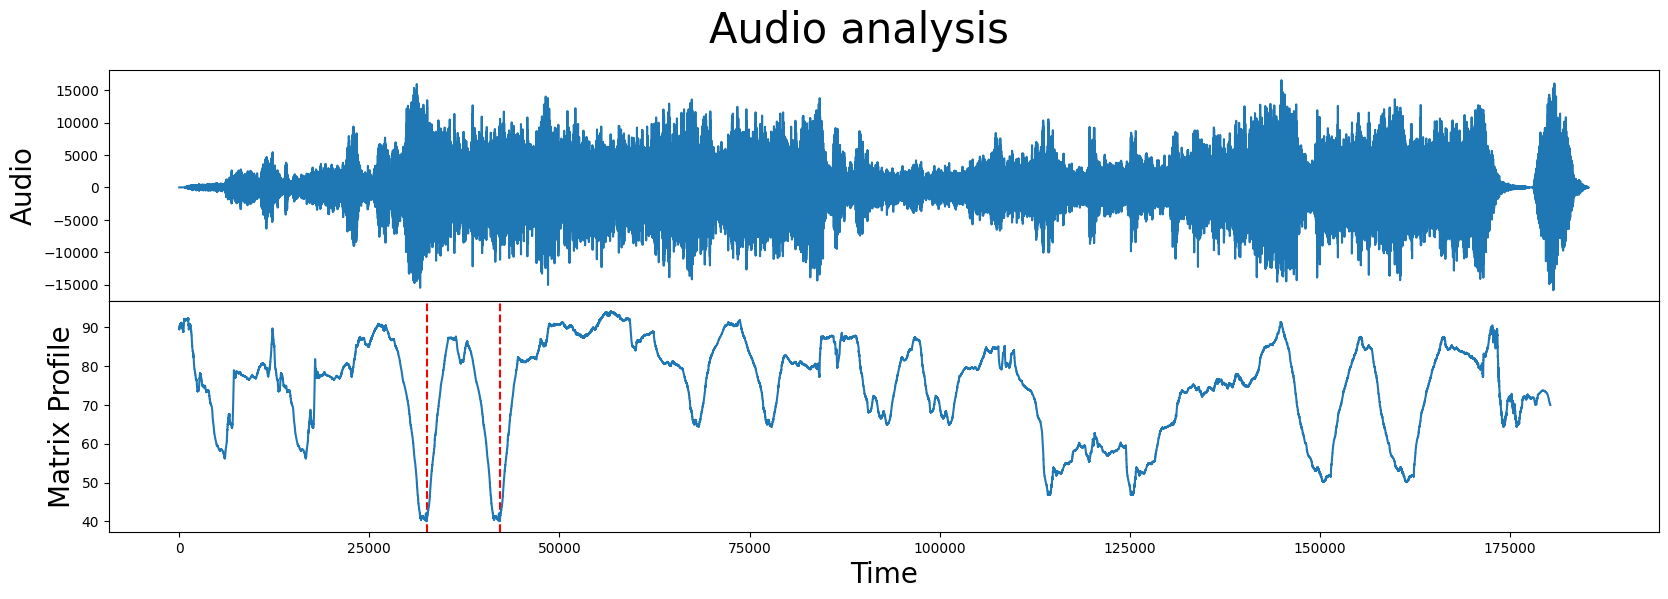

In [23]:
plot_matrix_profile(audio, profile, index)

### Repeating pattern

In [24]:
# get the lowest value in the matrix profile and it's nearest neighbour
motif_idx = np.argsort(profile)[0]
nearest_neighbor_idx = index[motif_idx]
motif_start = int(motif_idx/sampleRate)
nearest_neighbour_start = int(nearest_neighbor_idx/sampleRate)
print(f"The motif is located at seconds {motif_start} and it's nearest neighbour is at seconds {nearest_neighbour_start}")

The motif is located at seconds 42 and it's nearest neighbour is at seconds 32


In [14]:
def show_side_by_side(start1, start2):
    video1 = YouTubeVideo("vVwKbdBpNWE", start=start1, width=600, height=300)
    video2 = YouTubeVideo("vVwKbdBpNWE", start=start2, width=600, height=300)
    video_output1 = Output()
    video_output2 = Output()
    with video_output1:
        display.display(video1)
    with video_output2:
        display.display(video2)
    grid = GridspecLayout(1, 2)
    grid[0, 0] = video_output1
    grid[0, 1] = video_output2

    return grid

In [25]:
show_side_by_side(motif_start, nearest_neighbour_start)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

### Another repeating pattern

In [26]:
# Same as before but look at the right of the timeseries only
motif_idx = np.argsort(profile[140000:])[0] + 140000
nearest_neighbor_idx = index[motif_idx]
motif_start = int(motif_idx/sampleRate)
nearest_neighbour_start = int(nearest_neighbor_idx/sampleRate)
print(f"The motif at the right is located at seconds {motif_start} and {nearest_neighbour_start}")

The motif at the right is located at seconds 150 and 161


In [27]:
show_side_by_side(motif_start, nearest_neighbour_start)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

### Find the most different pattern (discord, anomaly)

In music, it could be a bridge, a solo, an impro.

The discord is located at seconds 150


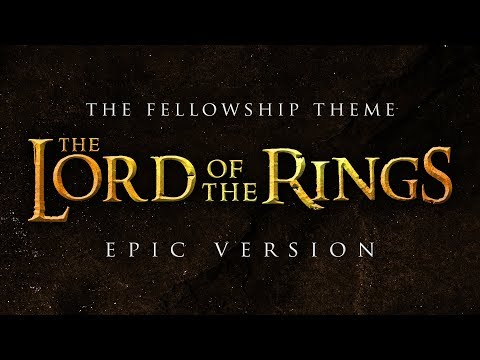

In [28]:
discord_idx = np.argsort(profile)[-1]
nearest_neighbor_idx = index[discord_idx]
discord_start = int(discord_idx/sampleRate)
nearest_neighbour_start = int(nearest_neighbor_idx/sampleRate)
print(f"The discord is located at seconds {motif_start}")
YouTubeVideo("vVwKbdBpNWE", start=discord_start, width=600, height=300)